In [ ]:
"""
Ho va Ten: Bui Thi Thanh Xuan
MSSV: 19110522
"""

In [ ]:
#import thư viện
from sklearn.model_selection import train_test_split
from keras.layers import Input, Reshape, Flatten, Dense, MaxPooling2D, Dropout, Conv2D
from keras.models import Model
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
#Kiểm tra version của keras
keras.__version__

'2.8.0'

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


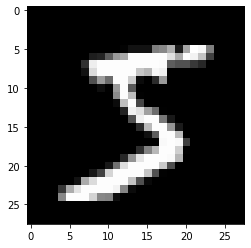

In [ ]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào (dùng ảnh trắng đen)
## tải MNIST dataset từ keras

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ validation/train=1/9

## **1. Tạo và huấn luyện mạng no-ron theo cấu trúc đã cho trên tập MNIST**

In [ ]:
def nnet(input_size = (28,28)):
    
    inputs = Input(shape=(input_size))
    reshape_inputs = Reshape((28,28,1))(inputs)
    flatten = Flatten()(inputs)

    dense1 = Dense(units=200, activation='relu')(flatten)
    dense2 = Dense(units=100, activation='relu')(dense1)
    dense3 = Dense(units=50, activation='relu')(dense2)
    dense4 = Dense(units=20, activation='relu')(dense3)
    softmax = Dense(units=10, activation='softmax')(dense4)

    model = Model(inputs=inputs, outputs=softmax)
    return model

In [ ]:
model = nnet()
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210   

## **2. Nêu cách tính số parameters sau mỗi layer**

Cách tính Param #: tổng số connections (paremeters) giữa các node ở lớp layer trước và hiện tại + số biases

    dense = 784 (nodes) x 200 (nodes) + 200 (bias) = 157000

    dense_1 = 200 (nodes) x 100 + 100 (bias) = 20100

    dense_2 = 100 (nodes) x 50 + 50 (bias) = 5050

    dense_3 = 50 (nodes) x 20 + 20 (bias) = 1020

    dense_4 = 20 (nodes) x 10 + 10 (bias) = 210

## **3. Cấu trúc ở câu 1 có thể được áp dụng cho bài toán regression được không, nếu có thì phải thay đổi như thế nào?**

Có, cần thay đổi lớp Fully-connected layer cuối (dense_4) với số units=1 và activation='linear'.

In [ ]:
# Training model
num_epochs = 20
batchsize = 100

history = model.fit(X_train,y_train,
                  epochs=num_epochs,
                  batch_size=batchsize,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
540/540 [==============================] - 4s 6ms/step - loss: 0.3472 - accuracy: 0.8962 - val_loss: 0.1665 - val_accuracy: 0.9520
Epoch 2/20
540/540 [==============================] - 3s 6ms/step - loss: 0.1168 - accuracy: 0.9647 - val_loss: 0.1100 - val_accuracy: 0.9682
Epoch 3/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0781 - accuracy: 0.9762 - val_loss: 0.0929 - val_accuracy: 0.9750
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0588 - accuracy: 0.9816 - val_loss: 0.1009 - val_accuracy: 0.9713
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0835 - val_accuracy: 0.9757
Epoch 6/20
540/540 [==============================] - 4s 8ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0851 - val_accuracy: 0.9788
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0993 - val_accuracy: 0.9745
Epoch 

In [ ]:
# Prediction 
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9801
Loss trên tập test:  0.10041283816099167  Accuracy trên tập test:  0.9800999760627747


## **Câu 4: Thiết kế một mạng Convolution 2D cho trước**

In [ ]:
def conv2D(input_size=(28,28)):
    inputs = Input(shape=input_size)

    reshape_input = Reshape((28,28,1))(inputs)

    conv1 = Conv2D(20, 5, activation = 'relu', padding='same')(reshape_input)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(20, 5, activation = 'relu')(pool1)

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    flatten = Flatten()(pool2)

    dense1 = Dense(units=40, activation='relu')(flatten)

    dense2 = Dense(units=20, activation='relu')(dense1)

    softmax = Dense(units=10, activation='softmax')(dense2)

    model = Model(inputs=inputs, outputs=softmax)
    
    return model

In [ ]:
# Model
model = conv2D()

# Model architecture
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 20)        10020     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 20)         0         
 2D)                                                       